In [9]:
import pandas as pd
import math
data = pd.read_csv("/content/Electric_Production.csv")

data['x'] = 0 #buat kolom x dengan nilai 0
X = data['x'] #buat variabel X utk menyimpan kolom x
X = X.tolist() #konversi ke list

for i in range(0, len(data)):
  X[i] = i+1

Y = data['IPG2211A2N']
Y = Y.tolist()

tanggal = data['DATE']
tanggal = tanggal.tolist()

#print(X)

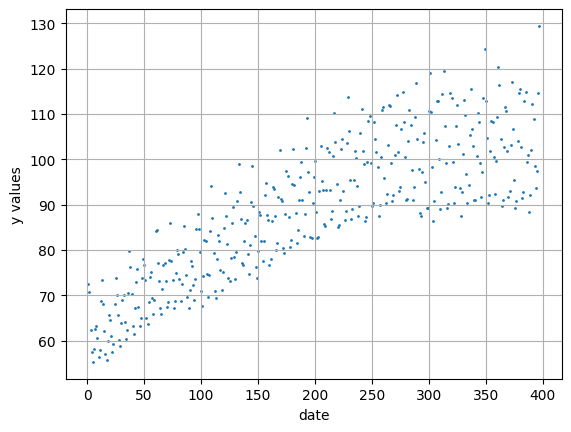

In [10]:
import matplotlib.pyplot as plt
plt.scatter(X, Y, s = 1)
plt.grid()
plt.xlabel('date')
plt.ylabel('y values')
plt.show()

In [11]:
#from decimal import Decimal

def gradient_descent(X, Y, w, b, alpha):

    dl_dw = 0.0                     # variabel sementara untuk menghitung -1 * X * (Y - (w * X + b)) atau bagian dari rumus gradient descent dari seluruh data
    dl_db = 0.0                     # variabel sementara untuk menghitung -1 * (Y - (w * X + b)) atau bagian dari rumus gradian descent dari seluruh data
    N = len(X)                      # hitung banyak data X, simpan di N

    # rumus gradient descent:
    # w = w - (1/N) * dl_dw * alpha
    # b = b - (1/N) * dl_db * alpha

    for i in range(N):              # iterasi sebanyak jumlah data (N)
        dl_dw += -1*X[i] * (Y[i] - (w*X[i] + b))  # dl_dw digunakan utk menyimpan hitungan -1 * X * (Y - (w * X + b)) dari setiap data, dan dijumlah total hasilnya
        dl_db += -1*(Y[i] - (w*X[i] + b))         # dl_db digunakan utk menyimpan hitungan -1 * (Y - (w * X + b)) dari setiap data, dan dijumlah total hasilnya

    w = w - (1/float(N)) * dl_dw * alpha          # menghitung nilai w
    b = b - (1/float(N)) * dl_db * alpha          # menghitung nilai b

    return w, b

# fungsi untuk cost function (kesalahan prediksi)
def cost_function (X, Y, w, b):
  # X = dataset kolom x (sumbu x)
  # Y = dataset kolom y (sumbu y)
  # N = banyak data kolom X
  # w dan b adalah parameter yg diperoleh dari fungsi gradient descent
  # rumus: total_error = 1/2 * N * (Y - (w * X - b)) ** 2


    N = len(X)                                   # hitung banyak data X
    total_error = 0.0
                        # variabel total error untuk menyimpan hasil perhitungan cost function, diberi nilai awal 0
    for i in range(N):                                    # hitung error untuk setiap data, berulang sebanyak banyak data
        total_error += (Y[i] - (w*X[i] - b))**2   # hitung dulu (Y - (w * X - b ))**2

    return total_error / (2*float(N))             # baru hasilnya dikali 1/2, dan dikirim ke fungsi train


# rumus regresi adalah => prediksi = w * x + b
# w dan b dicari menggunakan fungsi gradient descent
# X dan Y adalah data pada sumbu x dan sumbu y
# alpha adalah laju pengaturan perubahan nilai w dan b untuk mencari nilai w dan b yang paling bagus, biasanya alpha adalah antara 0.001 hinga 0.1
# n_iter adalah jumlah iterasi (berapa kali nilai w dan b akan dihitung utk mendapat nilai optimal)
# gunakan data training untuk fungsi train ini
def train(X, Y, w, b, alpha, n_iter):

    for i in range(n_iter):                        # training dilakukan berulang hingga sejumlah n_iter
        w, b = gradient_descent(X, Y, w, b, alpha) # hitung w dan b menggunakan fungsi gradient descent sebanyak n_iter kali

        if i % 400 == 0:                         # cetak hasilnya setiap kelipatan iterasi 400 (cetak pada iterasi ke 0, ke 400, ke 800, dst hingga 7000)
          print ("iteration:", i, "cost: ", cost_function(X, Y, w, b)) # cetak iterasi ke berapa (nilai i menunjukkan hitungan iterasi), cetak cost function utk menampilkan total error
    return w, b                                    # return hasil perhitungan w dan b


#fungsi untuk melakukan prediksi
def predict(x, w, b):                             # prediksi data testing dengan rumus regresi x * w + b, di mana x adalah data testing pada sumbu x
    return x*w + b

In [15]:
#Implementasi regresi single variabel

#hitung nilai w dan b
w, b = train(X, Y, 65, 65, 0.00000001, 17000)

#uji coba prediksi dengan memprediksi nilai y jika x adalah 50
x_new = 50.0
y_new = predict(x_new, w, b)
print("\n\nUji prediksi dengan satu data\n\nnilai y jika x = 50 adalah ", y_new)                             # tampilkan prediksi y jika x adalah 50

#lengkapi dengan melakukan prediksi untuk seluruh data testing!!
# data_test = pd.read_csv("Electric_Production.csv")                 # baca data testing dari file test.csv
x_test = X[:100]                             # ambil kolom x saja, salin ke x_test
y_test = Y[:100]
date_test = tanggal[:100]
y_prediction = list()                               # buat list bernama y_prediction untuk menyimpan hasil prediksi nilai y untuk setiap nilai x
n = len(x_test)                                     # hitung banyak data utk melakukan iterasi, simpan di n
for i in range(n):                                  # iterasi sebanyak n
  y_new = predict(x_test[i], w, b)                  # lakukan prediksi untuk setiap nilai x pada x_test, prediksi nilai y, simpan di y_new
  y_prediction.append(y_new)                        # simpan setiap nilai prediksi y ke list y_prediction

print("\n\nnilai x, nilai asli y, nilai prediksi y")                  # tampilkan hasilnya
for i in range(n):                                     # jangan print semuanya, print data setiap kelipatan 30 saja sebagai sample
  print(x_test[i],"      ", y_test[i],"      ", y_prediction[i])         # print x, dan print hasil prediksi y di sebelahnya


iteration: 0 cost:  109213062.76375216
iteration: 400 cost:  71360400.17841454
iteration: 800 cost:  46588024.4659689
iteration: 1200 cost:  30383545.870125227
iteration: 1600 cost:  19789800.84326785
iteration: 2000 cost:  12869106.2811871
iteration: 2400 cost:  8352015.957937809
iteration: 2800 cost:  5407049.464054712
iteration: 3200 cost:  3489737.270788769
iteration: 3600 cost:  2243668.2206475926
iteration: 4000 cost:  1435630.3945324563
iteration: 4400 cost:  913102.9821978371
iteration: 4800 cost:  576400.2589983247
iteration: 5200 cost:  360420.0342962276
iteration: 5600 cost:  222687.31094030145
iteration: 6000 cost:  135523.68489516617
iteration: 6400 cost:  80920.3142345899
iteration: 6800 cost:  47182.23656898505
iteration: 7200 cost:  26733.025564630745
iteration: 7600 cost:  14679.353642400622
iteration: 8000 cost:  7873.067118491463
iteration: 8400 cost:  4298.862190757644
iteration: 8800 cost:  2674.954140072953
iteration: 9200 cost:  2192.9968409226444
iteration: 9600

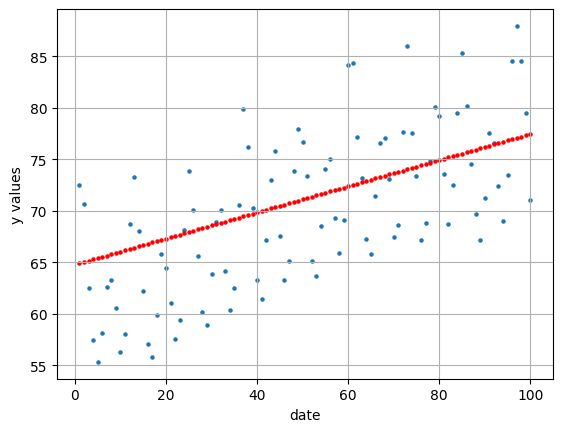

In [16]:
plt.scatter(x_test, y_test, s = 5)                          # grafik data asli
plt.scatter(x_test, y_prediction, c="Red", s = 5, zorder=1) # grafik data prediksi
plt.grid()
plt.xlabel("date")
plt.ylabel("y values")
plt.show()

In [17]:
# hitung akurasi
# Rumus mean squared error => selisih antara y_test dengan y_prediction dikuadratkan lalu di rata-rata
for i in range(len(y_test)):
  error = (y_test[i] - abs(y_prediction[i]))**2

mse = error / len(y_test)

print("Mean squared error (MSE): ", mse)
print("Root mean squared error (RMSE) :", math.sqrt(mse))

Mean squared error (MSE):  0.4095275735946558
Root mean squared error (RMSE) : 0.6399434143693142
